In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from xgboost import plot_tree

In [23]:
# Random Seed
np.random.seed(451)

In [25]:
# dataset
df = pd.read_excel('/Users/luca/Desktop/ML/drybeansML/data/DryBeanDataset/Dry_Bean_Dataset.xlsx')
df.head()

In [26]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Missing Value
missing_values_count = df.isnull().sum()

if (missing_values_count == 0).all():
    print('200') # no missing values
    print(f'Number of Samples: {len(df)}')
else:
    print('404') # missing values


# Change Class labels to numbers
SPECIES_MAP = {
   'BARBUNYA':0,
   'BOMBAY':1,
   'CALI':2,
   'DERMASON':3,
   'HOROZ':4,
   'SEKER':5,
   'SIRA':6
}

df['Class'] = df['Class'].map(SPECIES_MAP)

200
Number of Samples: 13543


In [27]:
# training set - testing set split
train_set, test_set = train_test_split(df,test_size=0.15, random_state=42)

train_set.reset_index(drop=True,inplace=True)
test_set.reset_index(drop=True,inplace=True)

In [28]:
# split features and labels
def feature_label_split(df: pd.DataFrame):

    if any(col == 'Class' for col in df.columns):
        class_label = df.pop('Class')
        features = df

        return features, class_label
    else:
        print("No column is named 'Class', The dataframe cannot be split.")

X_train, Y_train = feature_label_split(train_set)
X_test, Y_test = feature_label_split(test_set)

# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Create an XGBoost classifier model
model = xgb.XGBClassifier(random_state=42)

# Define the search space for hyperparameter tuning
search_space = {
    'n_estimators': [100, 200, 500],  # Number of trees in the ensemble
    'max_depth': [3, 6, 9],  # Maximum depth of each tree
    'gamma': [0.01, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node
    "learning_rate": [0.001, 0.01, 0.1]  # Learning rate (step size) for each boosting iteration
}

# Create a grid search object with the specified parameters
GS = GridSearchCV(estimator=model,  # XGBoost classifier model
                  param_grid=search_space,  # Search space for hyperparameters
                  scoring='f1_micro',  # Evaluation metric (F1 score for multiclass classification)
                  refit='f1_micro',  # Metric to optimize and use for model selection
                  cv=5,  # Number of cross-validation folds
                  verbose=4)  # Verbosity level (higher value for more detailed output)

# Fit the grid search object to the training data
GS.fit(X_train, Y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.890 total time=   1.8s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.897 total time=   1.8s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.886 total time=   1.8s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.897 total time=   2.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.897 total time=   1.8s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.892 total time=   3.5s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.899 total time=   3.5s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.887 total time=   3.3s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='f1_micro', scoring='f1_micro', verbose=4)

In [11]:
# Return best results
print(GS.best_estimator_)
print(GS.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}


{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Accuracy: 92.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       200
           1       1.00      1.00      1.00        87
           2       0.92      0.97      0.94       235
           3       0.91      0.93      0.92       523
           4       0.97      0.95      0.96       278
           5       0.96      0.94      0.95       311
           6       0.88      0.88      0.88       398

    accuracy                           0.93      2032
   macro avg       0.94      0.94      0.94      2032
weighted avg       0.93      0.93      0.93      2032


Confusion Matrix:
 [[177   0  14   0   0   2   7]
 [  0  87   0   0   0   0   0]
 [  5   0 227   0   1   1   1]
 [  0   0   0 487   0   6  30]
 [  1   0   5   4 265   0   3]
 [  4   0   0   6   0 292   9]
 [  1   0   0  38   6   3 350]]


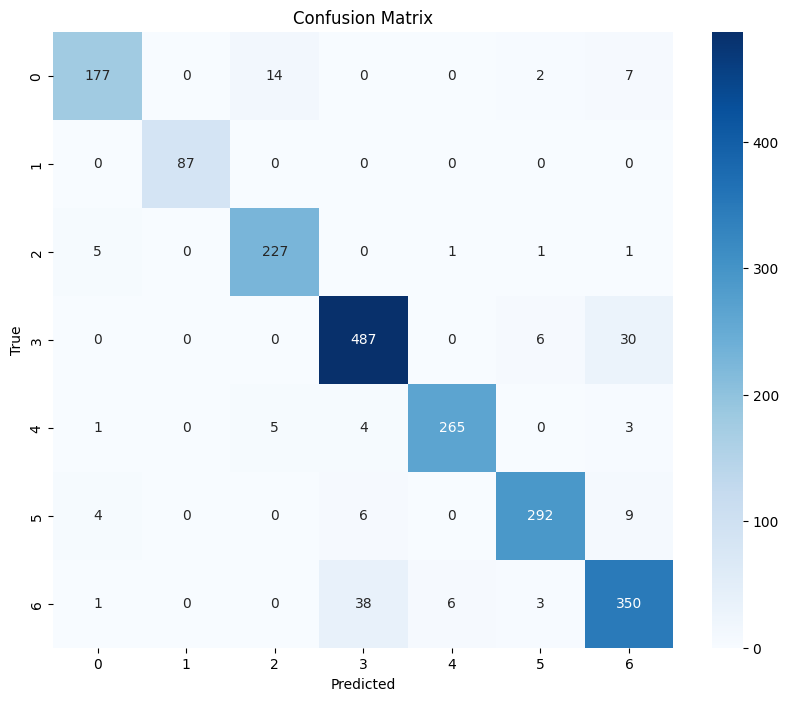

In [13]:
# Get the best parameters
best_params = GS.best_params_
print(best_params)

# Implement the best parameters into the model
best_xgb_model = xgb.XGBClassifier(**best_params,random_state=451)
best_xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate and display the accuracy, classification report, and confusion matrix
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

confusion_mtx = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()